##### Import Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

##### Load Dataset

In [4]:
data=pd.read_csv(r'D:\Intershipss\Ai nd Ml\Mall_Customers.csv')

In [5]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [6]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [20]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

##### Apply K-Means

In [21]:
kmeans = KMeans(n_clusters=5,n_init="auto",random_state=42)
y_kmeans = kmeans.fit_predict(X)

In [22]:
data['Cluster']=y_kmeans

In [23]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


##### Elbow Method(Optimal K)

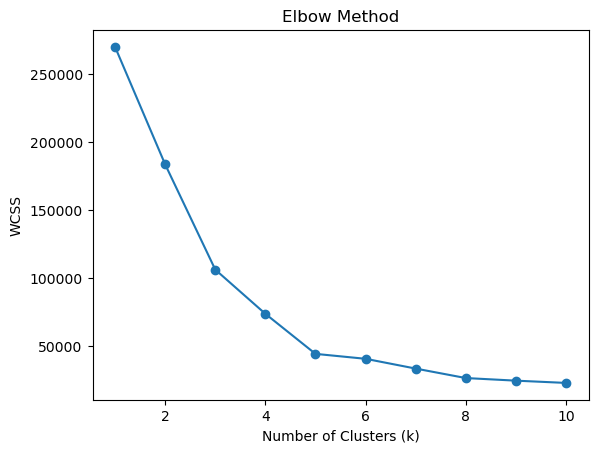

In [24]:
wcss=[]
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    wcss.append(km.inertia_)
plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

##### Visualize Clusters

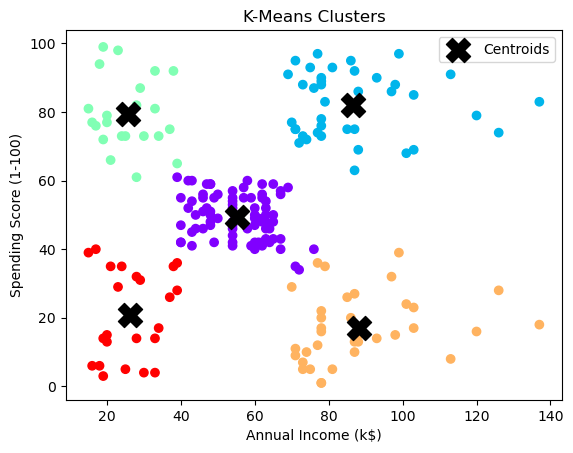

In [25]:
plt.scatter(X[:,0], X[:,1], c=y_kmeans, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            s=300, c='black', marker='X', label='Centroids')
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.title("K-Means Clusters")
plt.legend()
plt.show()

##### Evaluate Clustering (Silhouette Score)

In [26]:
score = silhouette_score(X, y_kmeans)

In [27]:
print("Silhouette Score:", score)

Silhouette Score: 0.553931997444648
